## Problem 1 ##

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
#Transforms regular matrix into probability matrix
def softmax(u):
    expu = np.exp(u)
    #print(expu)
    return expu/np.sum(expu)

#The difference between two probabilities
def multi_loss(p, q):
    return -sum(p*np.log(q))

#Gradient descent
def multilogreg_gradientdescent(x, y, alpha):
    N, d = x.shape
    x = np.insert(x, 0, 1, axis  = 1)
    k = y.shape[1]
    beta = np.zeros((k, d + 1))
    Lvals = []
    for i in range(200):
        L = multi_objective(x, y, beta)
        Lvals.append(L)
        
        for i in range(len(x)):
            xihat = x[i]
            yi = y[i]
            qi = softmax(beta@xihat.T)
            gradient = np.outer(qi - yi, xihat)
            beta = beta - alpha*gradient
    return beta, Lvals

#Objective function
def multi_objective(x, y, beta): #make edits
    L = 0
    for i in range(len(x)):
        xihat = x[i]
        yi = y[i]
        qi = softmax(beta@xihat)
        L += multi_loss(yi, qi)
    
    return L

#Prediction function
def predict(x,beta):
    x = np.insert(x,0,1, axis = 1)
    N = x.shape[0]
    predictions = []
    
    for i in range(N):
        xihat = x[i]
        qi = softmax(beta@xihat)
        k = np.argmax(qi)
        predictions.append(k)
    return predictions

## Problem 2 ##

In [16]:
#retrieving the data for x and y, for the training and testing sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

In [17]:
x_train = x_train/255
x_test = x_test/255
N_train, nrows, ncols = x_train.shape
N_test = x_test.shape[0]
x_train = np.reshape(x_train,(N_train,nrows*ncols))
x_test = np.reshape(x_test,(N_test,nrows*ncols))

y_train = pd.get_dummies(y_train).values

In [18]:
#Objective function
def eval_L(x,y,beta):
    L = 0
    for i in range(len(x)):
        xihat = x[i]
        yi = y[i]
        qi = softmax(beta@xihat)
        L += multi_loss(yi, qi)
    
    return L
        
#Computes stochastic gradient descent
def logreg_SGD(x, y, alpha):
    nepochs = 5 #number of epochs
    batch_size = 16 #batch size
    N, d = x.shape #dimensions of X
    x = np.insert(x, 0, 1, axis  = 1)
    k = y.shape[1] #number of classes
    beta = np.zeros((k, d + 1))
    Lvals = []
    
    for ep in range(nepochs): #the amount of times it sweeps through the data
        L = eval_L(x,y,beta)
        Lvals.append(L)
        print("Epoch is: " + str(ep) + " Cost is: " + str(L)) #The L values after each sweep, should be decreasing
        
        prm = np.random.permutation(N) #To randomly grab numbers in the dataset, essential for stochastic (random) GD
        batch_index = 0
        for start_i in range(0,N, batch_size):
            stop_i = start_i + batch_size
            stop_i = min(stop_i, N)
            num_examples_batch = stop_i - start_i
            
            for i in prm[start_i:stop_i]: 
                xihat = x[i]
                yi = y[i]
                qi = softmax(beta@xihat) #using matrix multiplication on beta against the augmented matrix x and
                                         #transforming the matrix into a probability matrix
                grad_i = np.outer(qi - yi, xihat) #calculating the Gradient
                grad_i = grad_i/num_examples_batch
                beta = beta - alpha*grad_i #continuously updating beta
    
    return beta, Lvals
            
#This function predict takes the values generated by qi, the predicted values, and places them in a matrix
def predict(x,beta):
    x = np.insert(x,0,1, axis = 1)
    N = x.shape[0]
    predictions = []
    probability = []
    
    for i in range(N):
        xihat = x[i]
        qi = softmax(beta@xihat)
        k = np.argmax(qi)
        predictions.append(k)
        probability.append(np.max(qi))
        
    return predictions, probability

Epoch is: 0 Cost is: 138155.10557972503
Epoch is: 1 Cost is: 25123.584591588966
Epoch is: 2 Cost is: 21899.888875300105
Epoch is: 3 Cost is: 20497.05888215431
Epoch is: 4 Cost is: 19659.749954533345


Text(0.5, 1.0, 'Multiclass Logistic Regression Using Stochastic Gradient Descent on MNIST Dataset')

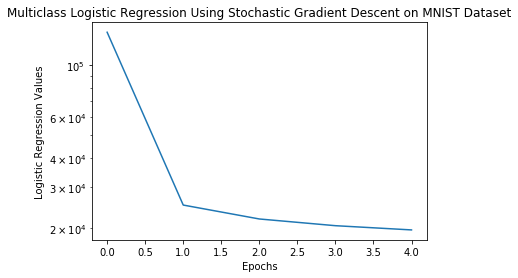

In [19]:
#Running my functions up above and graphing my results
alpha = .01
beta, Lvals = logreg_SGD(x_train, y_train, alpha)
plt.semilogy(Lvals)
plt.xlabel("Epochs")
plt.ylabel("Logistic Regression Values")
plt.title("Multiclass Logistic Regression Using Stochastic Gradient Descent on MNIST Dataset")


In [7]:
#Calculating the Accuracy by comparing the predicted values against the actual data using the test dataset
predictions, probability = predict(x_test, beta)
correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        correct +=1
        
print("Accuracy: " + str(correct/len(predictions)))

Accuracy: 0.9153


## Examples When Classifier is Confused ##

In [8]:
agreement = predictions == y_test
sortindex = np.argsort(probability)
sortindex = sortindex[::-1]
probability = np.array(probability)
diffy = []
for i in sortindex:
    if agreement[i] == False:
        diffy.append(i)

There was 0.8294387385049595 accuracy. The code predicted a 6. The correct hand written number is 1.


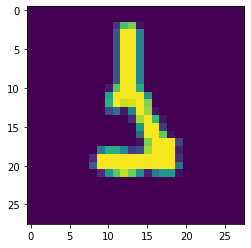

In [10]:
i = diffy[100]
xi = np.reshape(x_test[i], (28,28))
plt.imshow(xi)
print("There was " + str(probability[i]) + " accuracy. The code predicted a " + str(predictions[i]) + ". The correct hand written number is " + str(y_test[i]) + ".")

There was 0.9440863646330888 accuracy. The code predicted a 2. The correct hand written number is 7.


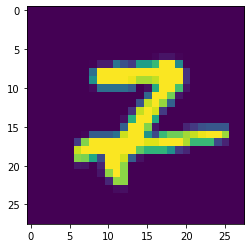

In [11]:
i = diffy[26]
xi = np.reshape(x_test[i], (28,28))
plt.imshow(xi)
print("There was " + str(probability[i]) + " accuracy. The code predicted a " + str(predictions[i]) + ". The correct hand written number is " + str(y_test[i]) + ".")

There was 0.93688506896836 accuracy. The code predicted a 7. The correct hand written number is 5.


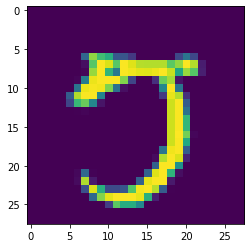

In [12]:
i = diffy[31]
xi = np.reshape(x_test[i], (28,28))
plt.imshow(xi)
print("There was " + str(probability[i]) + " accuracy. The code predicted a " + str(predictions[i]) + ". The correct hand written number is " + str(y_test[i]) + ".")